In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [8]:
# STEP 2: Load cleaned data
df = pd.read_csv("freedom_cleaned.csv")

In [10]:
# STEP 3: Set feature columns and target columns
features = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
targets = ['PR rating', 'CL rating', 'TotalScore']

In [12]:
# STEP 4: Initialize results dictionary
results = {}

In [14]:

# STEP 5: Loop through each target variable and train/test a model
for target in targets:
    X = df[features]
    y = df[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluation metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Save metrics
    results[target] = {
        "RMSE": round(rmse, 2),
        "MAE": round(mae, 2),
        "R2": round(r2, 2)
    }

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


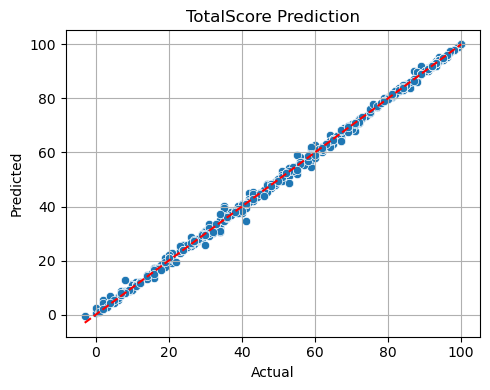

In [18]:
# STEP 6: Plot predicted vs actual
plt.figure(figsize=(5, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"{target} Prediction")
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# STEP 7: Display summary table
pd.DataFrame(results).T

,RMSE,MAE,R2
PR rating,0.14,0.05,1.00
CL rating,0.14,0.04,0.99
TotalScore,1.00,0.54,1.00
